## Árboles de decisión con el dataset de clasificación de adultos

#### Descripción de los datos:

En este notebook vamos a ver otro ejemplo del uso de los árboles de decisión. En este caso, trabajaremos con un dataset que clasifica demográficamente a una serie de individuos en base a lo que ellos ingresan al año, en concreto, si es más de 50,000$/año o no.

El dataset está compuesto por las siguientes variables, donde podemos hacer una división en categóricas y continuas. Veamos los valores y la definición de cada una de ellas:

**Variables categóricas**

 - **workclass**: Categoría del trabajo que desempeña.
 
 Valores: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.


 - **education**: Nivel de estudios
 
 Valores: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 
 - **marital-status**: estado civil
 
 Valores: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

 - **occupation**: Puesto de trabajo.
 
 Valores: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 
 - **relationship**: Relación familiar.
 
 Valores: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

 - **race**: Raza del individuo.
 
 Valores: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

 - **sex**: Género.
 
 Valores: Female, Male.

 - **native-country**: país de nacimiento.
 
 Valores: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 

**Variables continuas**

 - Age: Edad del individuo.

 - fnlwgt: Peso final. Los pesos en los archivos CPS se controlan con estimaciones independientes de la población civil no interinstitucional de los Estados Unidos. Estos son preparados mensualmente por la Population Division en la Census Bureau.

 - Capital-gain: Sin descripción.

 - Capital-loss: Sin descripción.

 - Hours-per-week: horas de trabajo a la semana

**Target**

 - Ganancias anuales. Los valores deberían de ser binarios para poder realizar nuestra clasificación en >50K/año y no

#### 1. Leemos los datos de train y test

En este caso, los datos que nos dan ya están divididos en train y test, así que los cargamos como nos han indicado. Ahora, ya no deberemos hacer el train_test_split.

Lee los ficheros "adult_train.csv" y "adult_test.csv", dentro de la carpeta "data":

In [2]:
import pandas as pd

df_train = pd.read_csv("data/adult_train.csv", sep=';')
df_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df_test = pd.read_csv("data/adult_test.csv", sep=';').drop(0)
df_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


#### 2. Convierte el Target en numérico

Codifica la salida en unos y ceros, en función de que cobre más de 50K (1) o no (0)


In [4]:
df_train['Target'].unique()[1]

' >50K'

In [5]:
dic_tar = {
    ' >50K': 1,
    ' >50K.': 1,
    ' <=50K': 0,
    ' <=50K.': 0
}

df_train['Target'] = df_train['Target'].apply(lambda x: dic_tar[x])

In [6]:
df_test['Target'] = df_test['Target'].apply(lambda x: dic_tar.get(x))
df_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,0
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0


In [7]:
df_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

#### 3. Primer análisis

1. Obten los estadísticos principales del dataset que estamos estudiando
2. Calcula la distribución básica de los valores de cada variable categórica (¿cuántos tengo de cada clase?)
3. Representa una serie de histogramas de cada feature del dataset para ver cómo se distribuyen gráficamente

In [8]:
df_train.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
cat_cols = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
    
for col in cat_cols:
    print(col)
    print(df_train[col].value_counts(), '\n')


Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

Martial_Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial_Status, dtype: int64 

Occupation
 Prof-specialty       4140
 Craft-repair     

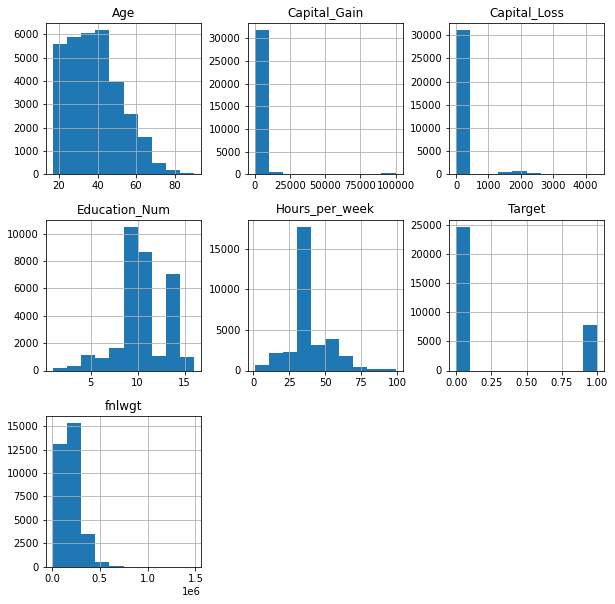

In [10]:
num_cols = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

# num_cols = [col for col in df_train.columns if col not in cat_cols]
df_train.hist(figsize=(10, 10));

In [11]:
df_train[['Education', 'Education_Num']].drop_duplicates()

,Education,Education_Num
0,Bachelors,13
2,HS-grad,9
3,11th,7
5,Masters,14
6,9th,5
10,Some-college,10
13,Assoc-acdm,12
14,Assoc-voc,11
15,7th-8th,4
20,Doctorate,16


#### 4. Comprueba los tipos
1. Comprueba los tipos de las variables de train y test. ¿Observas alguna diferencia?
2. Si encuentras alguna, soluciónala
3. Convierte a numéricas todas aquellas variables susceptibles de serlo y que no lo son en el dataset

In [12]:
pd.DataFrame({'train': df_train.dtypes, 'test': df_test.dtypes})

,train,test
Age,int64,object
Workclass,object,object
fnlwgt,int64,float64
Education,object,object
Education_Num,int64,float64
Martial_Status,object,object
Occupation,object,object
Relationship,object,object
Race,object,object
Sex,object,object


In [13]:
for col in num_cols:
    df_test[col] = df_test[col].astype(int)

In [14]:
pd.DataFrame({'train': df_train.dtypes, 'test': df_test.dtypes})

,train,test
Age,int64,int32
Workclass,object,object
fnlwgt,int64,int32
Education,object,object
Education_Num,int64,int32
Martial_Status,object,object
Occupation,object,object
Relationship,object,object
Race,object,object
Sex,object,object


#### 5. Valores nulos
1. Rellena todos los nulos de las variables numéricas con su mediana
2. Rellena todos los nulos de las variables categóricas con su moda

In [16]:
# Sacamos tipos:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [23]:
# Sacamos columnas categóricas y numéricas:
categorical_columns = [c for c in df_train.columns if df_train[c].dtype.name == 'object']
numerical_columns = [c for c in df_train.columns if df_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']


In [24]:
# ¿Como podemos sacar la moda de una variable categórica?
df_train['Workclass'].mode()[0]

' Private'

In [25]:
# Reemplazamos los valores que nos han dicho: nulos en categóricas por la moda, y en las numéricas por la media
for c in categorical_columns:
    df_train[c].fillna(df_train[c].mode()[0], inplace=True)
    df_test[c].fillna(df_train[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    df_train[c].fillna(df_train[c].median(), inplace=True)
    df_test[c].fillna(df_train[c].median(), inplace=True)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


#### 6. Convierte las variables categóricas

Ahora que ya hemos llenado todas las categóricas con valores no nulos, codifica cada una de ellas con OHE para que puedan ser utilizadas por el algoritmo

#### 7. Comprueba cualquier tipo de incosistencia entre train y test

#### 8. Separa las muestras entre los datos de entrada y las etiquetas de predicción para usar un algoritmo

#### 9. Modela

Entrena un Clasificador basado en Árboles de Decisión con una profundidad máxima de 3, y evalúa la precisión del algoritmo con los datos de test. Para poder reproducir los datos, utiliza un parámetro ``random_state=42``

Haz algunas predicciones sobre los datos de test y comprueba si has acertado o no

Intenta entender el comportamiento del algoritmo dibujando el equema de división de los nodos y splits:

#### 10. Obtén la importancia de las variables

#### 11. Compara con la regresión logística

Calcula el score que has obtenido con el árbol de decisión y compáralo con un modelo de regresión logística. Para ello, crea y entrena un nuevo modelo

#### 12. Prueba a variar diferentes parámetros

A diferencia de una regresión lineal, donde los parámetros están muy acotados, en los árboles de decisión existe una gran variedad de grados de libertad, lo que se refleja en los diferentes parámetros que los definen. Si vamos a su documentación, podremos observar la catidad de ellos que se pueden modificar.

Prueba a jugar con los sigueintes: splitter, max_depth, min_samples_split, min_samples_leaf, max_features... Lee su definición para entender qué van a hacer, aunque la mayoría de veces no vamos a poder preveer cómo vana a actuar, y mucho menos combinados unos con otros. Por eso solemos dejar que el propio ordenador vaya probando diferentes combinaciones con el GridSearchCV, el cual puedes utilizar en este apartado, una vez hayas probado a jugar con los parámetros y cómo afectan a tu modelo